In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
from osgeo import gdal
import pprint
import time

In [48]:
# Carregar os dados do grib da data especificada
data = "20190108"
ciclo = "00"
grib = gdal.Open("../grib/{}_{}/gfs.t00z.pgrb2.0p25.f000".format(data, ciclo))

## Numero de Bandas / Layers

In [5]:
number_of_bands = grib.RasterCount
print(number_of_bands)

354


## Nome cada Layer

In [6]:
for i in range(1,number_of_bands+1):
    band = grib.GetRasterBand(i)
    metadata = band.GetMetadata()
    band_name = metadata['GRIB_COMMENT']
    band_description = band.GetDescription()
    print("{} : {} \t\t- {}".format(i,band_name,band_description))

1 : Visibility [m] 		- 0[-] SFC="Ground or water surface"
2 : u-component of wind [m/s] 		- 0[-] RESERVED(220) (Reserved Local use)
3 : v-component of wind [m/s] 		- 0[-] RESERVED(220) (Reserved Local use)
4 : (prodType 0, cat 2, subcat 224) [-] [-] 		- 0[-] RESERVED(220) (Reserved Local use)
5 : Wind speed (gust) [m/s] 		- 0[-] SFC="Ground or water surface"
6 : Geopotential height [gpm] 		- 100[Pa] ISBL="Isobaric surface"
7 : Temperature [C] 		- 100[Pa] ISBL="Isobaric surface"
8 : Relative humidity [%] 		- 100[Pa] ISBL="Isobaric surface"
9 : u-component of wind [m/s] 		- 100[Pa] ISBL="Isobaric surface"
10 : v-component of wind [m/s] 		- 100[Pa] ISBL="Isobaric surface"
11 : Ozone Mixing Ratio [kg/kg] 		- 100[Pa] ISBL="Isobaric surface"
12 : Geopotential height [gpm] 		- 200[Pa] ISBL="Isobaric surface"
13 : Temperature [C] 		- 200[Pa] ISBL="Isobaric surface"
14 : Relative humidity [%] 		- 200[Pa] ISBL="Isobaric surface"
15 : u-component of wind [m/s] 		- 200[Pa] ISBL="Isobaric surface"


## Limites do dataset

In [15]:
ulx, xres, xskew, uly, yskew, yres  = grib.GetGeoTransform()
lrx = ulx + (grib.RasterXSize * xres)
lry = uly + (grib.RasterYSize * yres)
print("{} {} {} {}".format(ulx, uly, lrx, lry))

-0.125 90.125 359.875 -90.125


In [22]:
grib.GetGeoTransform()

(-0.125, 0.25, 0.0, 90.125, 0.0, -0.25)

## Metadados do layer 1

In [37]:
band = grib.GetRasterBand(1)
pprint.pprint(band.GetMetadata())

{'GRIB_COMMENT': 'Visibility [m]',
 'GRIB_ELEMENT': 'VIS',
 'GRIB_FORECAST_SECONDS': '0 sec',
 'GRIB_PDS_PDTN': '0',
 'GRIB_PDS_TEMPLATE_NUMBERS': '19 0 2 0 81 0 0 0 1 0 0 0 0 1 0 0 0 0 0 255 0 0 '
                              '0 0 0',
 'GRIB_REF_TIME': '  1546905600 sec UTC',
 'GRIB_SHORT_NAME': '0-SFC',
 'GRIB_UNIT': '[m]',
 'GRIB_VALID_TIME': '  1546905600 sec UTC'}


## Hora UTC

In [ ]:
horaUTC= int(band.GetMetadata()['GRIB_REF_TIME'].split("sec UTC")[0])
forecast = int(band.GetMetadata()['GRIB_FORECAST_SECONDS'].split("sec")[0])
time.strftime('%d-%m-%Y - %H:%M', time.gmtime(horaUTC+forecast))

## Tamanho do SHAPE

In [36]:
data.shape

(360, 400)

## PrintLayer 275

<Figure size 1440x1296 with 0 Axes>

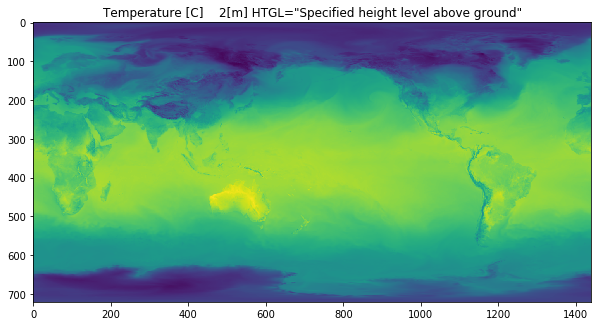

In [47]:
band = grib.GetRasterBand(261)
data = band.ReadAsArray()
plt.figure(figsize=(20,18))
metadata = band.GetMetadata()
band_name = metadata['GRIB_COMMENT']
band_description = band.GetDescription()
plt.figure(figsize=(10,9))
plt.title("{}    {}".format(band_name, band_description))
plt.imshow(data)

## CROP America Sul

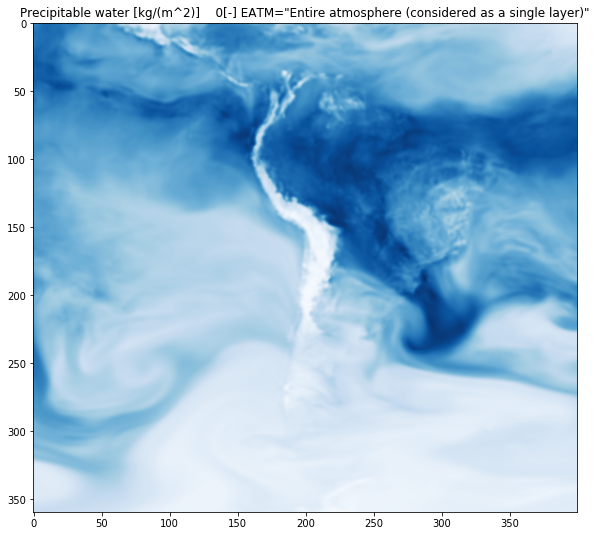

In [46]:
band = grib.GetRasterBand(275)
data = band.ReadAsArray()
metadata = band.GetMetadata()
band_name = metadata['GRIB_COMMENT']
band_description = band.GetDescription()
plt.figure(figsize=(10,9))
plt.title("{}    {}".format(band_name, band_description))
dataCrop = data[280:640,960:1360]
plt.imshow(data, cmap='Blues', interpolation='bicubic')